In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
data=pd.read_csv("./web_data.csv")#veri setini yükleme

C:\Users\altay\AppData\Local\Temp\ipykernel_480\23965808.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("./web_data.csv")#veri setini yükleme


In [86]:
data['Paragraf Sayısı'] = pd.to_numeric(data['Paragraf Sayısı'], errors='coerce')

# Sadece sayısal olanları tutalım (NaN olanları silelim)
data = data.dropna(subset=['Paragraf Sayısı'])

# Sütundaki değerleri int'e çevirelim
data['Paragraf Sayısı'] = data['Paragraf Sayısı'].astype(np.float64)

In [87]:
data.info()#sütunlarımız hakkında bilgi alıyoruz

<class 'pandas.core.frame.DataFrame'>
Index: 34884 entries, 2 to 72946
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Domain                       34884 non-null  object 
 1   Alan Uzantısı                34884 non-null  object 
 2   Resim Sayısı                 34884 non-null  float64
 3   Video Sayısı                 34884 non-null  float64
 4   Multi Medya Kullanım Sayısı  34884 non-null  float64
 5   Toplam Kelime Sayısı         34884 non-null  float64
 6   Paragraf Sayısı              34884 non-null  float64
 7   H1 Sayısı                    34884 non-null  float64
 8   H2 Sayısı                    34884 non-null  float64
 9   H3 Sayısı                    34884 non-null  float64
 10  Vurgulu Kelime Sayısı        34884 non-null  float64
 11  Kalın Kelime Sayısı          34884 non-null  float64
 12  Liste Sayısı                 34884 non-null  float64
 13  Bağlantı Sayısı      

In [88]:
def_cleaned=data.dropna(subset=['Alan Uzantısı'])#Alan uzantısı null olan satırları siliyoruz çünkü alan uzantısı null olanların tamamı null geliyor
data=def_cleaned

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34884 entries, 2 to 72946
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Domain                       34884 non-null  object 
 1   Alan Uzantısı                34884 non-null  object 
 2   Resim Sayısı                 34884 non-null  float64
 3   Video Sayısı                 34884 non-null  float64
 4   Multi Medya Kullanım Sayısı  34884 non-null  float64
 5   Toplam Kelime Sayısı         34884 non-null  float64
 6   Paragraf Sayısı              34884 non-null  float64
 7   H1 Sayısı                    34884 non-null  float64
 8   H2 Sayısı                    34884 non-null  float64
 9   H3 Sayısı                    34884 non-null  float64
 10  Vurgulu Kelime Sayısı        34884 non-null  float64
 11  Kalın Kelime Sayısı          34884 non-null  float64
 12  Liste Sayısı                 34884 non-null  float64
 13  Bağlantı Sayısı      

In [90]:
data=data.drop(columns=['Domain'])#Domain sütununu kaldırıyoruz bizim işimize yarayacak bir veri değil

In [91]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Alan Uzantısı']=le.fit_transform(data['Alan Uzantısı'])

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

print(label_mapping)

{'ac': 0, 'academy': 1, 'ad': 2, 'ae': 3, 'aero': 4, 'af': 5, 'ag': 6, 'agency': 7, 'ai': 8, 'al': 9, 'am': 10, 'app': 11, 'ar': 12, 'art': 13, 'asia': 14, 'at': 15, 'au': 16, 'az': 17, 'ba': 18, 'bd': 19, 'be': 20, 'bg': 21, 'bio': 22, 'biz': 23, 'blog': 24, 'br': 25, 'bs': 26, 'buzz': 27, 'by': 28, 'bz': 29, 'bzh': 30, 'ca': 31, 'cards': 32, 'cat': 33, 'cc': 34, 'cd': 35, 'ch': 36, 'city': 37, 'cl': 38, 'click': 39, 'cloud': 40, 'club': 41, 'cm': 42, 'cn': 43, 'co': 44, 'coffee': 45, 'com': 46, 'community': 47, 'cool': 48, 'cr': 49, 'cx': 50, 'cz': 51, 'de': 52, 'deals': 53, 'dev': 54, 'digital': 55, 'directory': 56, 'dj': 57, 'dk': 58, 'do': 59, 'dz': 60, 'ec': 61, 'ee': 62, 'eg': 63, 'es': 64, 'eu': 65, 'eus': 66, 'expert': 67, 'fi': 68, 'fish': 69, 'fm': 70, 'fr': 71, 'fun': 72, 'game': 73, 'games': 74, 'ge': 75, 'gg': 76, 'gift': 77, 'global': 78, 'gr': 79, 'gs': 80, 'gt': 81, 'guide': 82, 'hk': 83, 'hosting': 84, 'house': 85, 'hr': 86, 'hu': 87, 'icu': 88, 'id': 89, 'ie': 90, 'i

In [92]:
le_kategory=LabelEncoder()

data['Kategory']=le_kategory.fit_transform(data['Kategory'])

label_mapping_kategory = dict(zip(le_kategory.classes_, range(len(le_kategory.classes_))))

print(label_mapping_kategory)
print(data['Kategory'])

{'games': 0, 'news_and_media': 1, 'shopping': 2, 'social_networking': 3}
2        0
3        0
4        0
5        0
6        0
        ..
72942    3
72943    3
72944    3
72945    3
72946    3
Name: Kategory, Length: 34884, dtype: int32


In [93]:
data['Responsive Tasarım Varlığı']=data['Responsive Tasarım Varlığı'].replace('Var',1)
data['Responsive Tasarım Varlığı']=data['Responsive Tasarım Varlığı'].replace('Yok',0)

data['Responsive Tasarım Varlığı']=data['Responsive Tasarım Varlığı'].astype(np.float64)

In [94]:
data['Responsive Tasarım Varlığı'].value_counts()

Responsive Tasarım Varlığı
1.0    26462
0.0     8422
Name: count, dtype: int64

In [95]:
data['Sosyal Medya Varlığı'] = data['Sosyal Medya Varlığı'].fillna(1)
data['Sosyal Medya Varlığı']=data['Sosyal Medya Varlığı'].replace('var',1)
data['Sosyal Medya Varlığı']=data['Sosyal Medya Varlığı'].replace('yok',0)
data['Sosyal Medya Varlığı']=data['Sosyal Medya Varlığı'].astype(np.float64)

In [96]:
data['Ödeme Sistemlerinin Varlığı']=data['Ödeme Sistemlerinin Varlığı'].replace('Var',1)
data['Ödeme Sistemlerinin Varlığı']=data['Ödeme Sistemlerinin Varlığı'].replace('Yok',0)
data['Ödeme Sistemlerinin Varlığı']=data['Ödeme Sistemlerinin Varlığı'].astype(np.float64)

In [97]:
data['Çerezlerin Varlığı']=data['Çerezlerin Varlığı'].replace('Var',1)
data['Çerezlerin Varlığı']=data['Çerezlerin Varlığı'].replace('Yok',0)
data['Çerezlerin Varlığı']=data['Çerezlerin Varlığı'].astype(np.float64)

In [98]:
data['Arama Fonksiyonu']=data['Arama Fonksiyonu'].replace('yok',0)
data['Arama Fonksiyonu']=data['Arama Fonksiyonu'].replace('var',1)
data['Arama Fonksiyonu']=data['Arama Fonksiyonu'].astype(np.float64)

In [99]:
data_columns_header=data.columns
print(data_columns_header)

Index(['Alan Uzantısı', 'Resim Sayısı', 'Video Sayısı',
       'Multi Medya Kullanım Sayısı', 'Toplam Kelime Sayısı',
       'Paragraf Sayısı', 'H1 Sayısı', 'H2 Sayısı', 'H3 Sayısı',
       'Vurgulu Kelime Sayısı', 'Kalın Kelime Sayısı', 'Liste Sayısı',
       'Bağlantı Sayısı', 'Dış Bağlantı Sayısı', 'İç Bağlantı Sayısı',
       'Form Sayısı', 'Buton Sayısı', 'Girdi Sayısı',
       'Responsive Tasarım Varlığı', 'Sosyal Medya Varlığı',
       'Ödeme Sistemlerinin Varlığı', 'Çerezlerin Varlığı', 'Meta Tag Sayısı',
       'Arama Fonksiyonu', 'Menü Sayısı', 'Kategory'],
      dtype='object')


In [100]:
for column in data_columns_header:
    most_common_value = data[column].value_counts().idxmax()
    count_of_most_common = data[column].value_counts().max()
    print(f"{column} sütunundaki en fazla geçen değer: {most_common_value} ({count_of_most_common} kez)")

Alan Uzantısı sütunundaki en fazla geçen değer: 46 (20821 kez)
Resim Sayısı sütunundaki en fazla geçen değer: 0.0 (6248 kez)
Video Sayısı sütunundaki en fazla geçen değer: 0.0 (33581 kez)
Multi Medya Kullanım Sayısı sütunundaki en fazla geçen değer: 0.0 (5954 kez)
Toplam Kelime Sayısı sütunundaki en fazla geçen değer: 0.0 (2101 kez)
Paragraf Sayısı sütunundaki en fazla geçen değer: 0.0 (8448 kez)
H1 Sayısı sütunundaki en fazla geçen değer: 0.0 (16440 kez)
H2 Sayısı sütunundaki en fazla geçen değer: 0.0 (15690 kez)
H3 Sayısı sütunundaki en fazla geçen değer: 0.0 (16498 kez)
Vurgulu Kelime Sayısı sütunundaki en fazla geçen değer: 0.0 (29700 kez)
Kalın Kelime Sayısı sütunundaki en fazla geçen değer: 0.0 (19493 kez)
Liste Sayısı sütunundaki en fazla geçen değer: 0.0 (10723 kez)
Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (4591 kez)
Dış Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (6234 kez)
İç Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (7777 kez)
Form Sayısı s

In [101]:
data = data[~((data['Multi Medya Kullanım Sayısı'] == 0) & (data['Toplam Kelime Sayısı'] == 0) & (data['Bağlantı Sayısı'] == 0))]

In [102]:
data['Kalın Kelime Sayısı'] = data.apply(
    lambda row: row['Vurgulu Kelime Sayısı'] if row['Kalın Kelime Sayısı'] == 0 and row['Vurgulu Kelime Sayısı'] != 0 else row['Kalın Kelime Sayısı'], 
    axis=1
)

In [103]:
for column in data_columns_header:
    most_common_value = data[column].value_counts().idxmax()
    count_of_most_common = data[column].value_counts().max()
    print(f"{column} sütunundaki en fazla geçen değer: {most_common_value} ({count_of_most_common} kez)")

Alan Uzantısı sütunundaki en fazla geçen değer: 46 (19563 kez)
Resim Sayısı sütunundaki en fazla geçen değer: 0.0 (4243 kez)
Video Sayısı sütunundaki en fazla geçen değer: 0.0 (31576 kez)
Multi Medya Kullanım Sayısı sütunundaki en fazla geçen değer: 0.0 (3949 kez)
Toplam Kelime Sayısı sütunundaki en fazla geçen değer: 1.0 (584 kez)
Paragraf Sayısı sütunundaki en fazla geçen değer: 0.0 (6444 kez)
H1 Sayısı sütunundaki en fazla geçen değer: 0.0 (14436 kez)
H2 Sayısı sütunundaki en fazla geçen değer: 0.0 (13685 kez)
H3 Sayısı sütunundaki en fazla geçen değer: 0.0 (14493 kez)
Vurgulu Kelime Sayısı sütunundaki en fazla geçen değer: 0.0 (27695 kez)
Kalın Kelime Sayısı sütunundaki en fazla geçen değer: 0.0 (16258 kez)
Liste Sayısı sütunundaki en fazla geçen değer: 0.0 (8718 kez)
Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (2586 kez)
Dış Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (4229 kez)
İç Bağlantı Sayısı sütunundaki en fazla geçen değer: 0.0 (5772 kez)
Form Sayısı süt

In [104]:
data=data.drop('Video Sayısı',axis=1)
data=data.drop('Vurgulu Kelime Sayısı',axis=1)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32879 entries, 2 to 72946
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alan Uzantısı                32879 non-null  int32  
 1   Resim Sayısı                 32879 non-null  float64
 2   Multi Medya Kullanım Sayısı  32879 non-null  float64
 3   Toplam Kelime Sayısı         32879 non-null  float64
 4   Paragraf Sayısı              32879 non-null  float64
 5   H1 Sayısı                    32879 non-null  float64
 6   H2 Sayısı                    32879 non-null  float64
 7   H3 Sayısı                    32879 non-null  float64
 8   Kalın Kelime Sayısı          32879 non-null  float64
 9   Liste Sayısı                 32879 non-null  float64
 10  Bağlantı Sayısı              32879 non-null  float64
 11  Dış Bağlantı Sayısı          25094 non-null  float64
 12  İç Bağlantı Sayısı           25094 non-null  float64
 13  Form Sayısı          

In [106]:
data['Dış Bağlantı Sayısı'] = data['Dış Bağlantı Sayısı'].fillna(0)
data['İç Bağlantı Sayısı'] = data['İç Bağlantı Sayısı'].fillna(0)

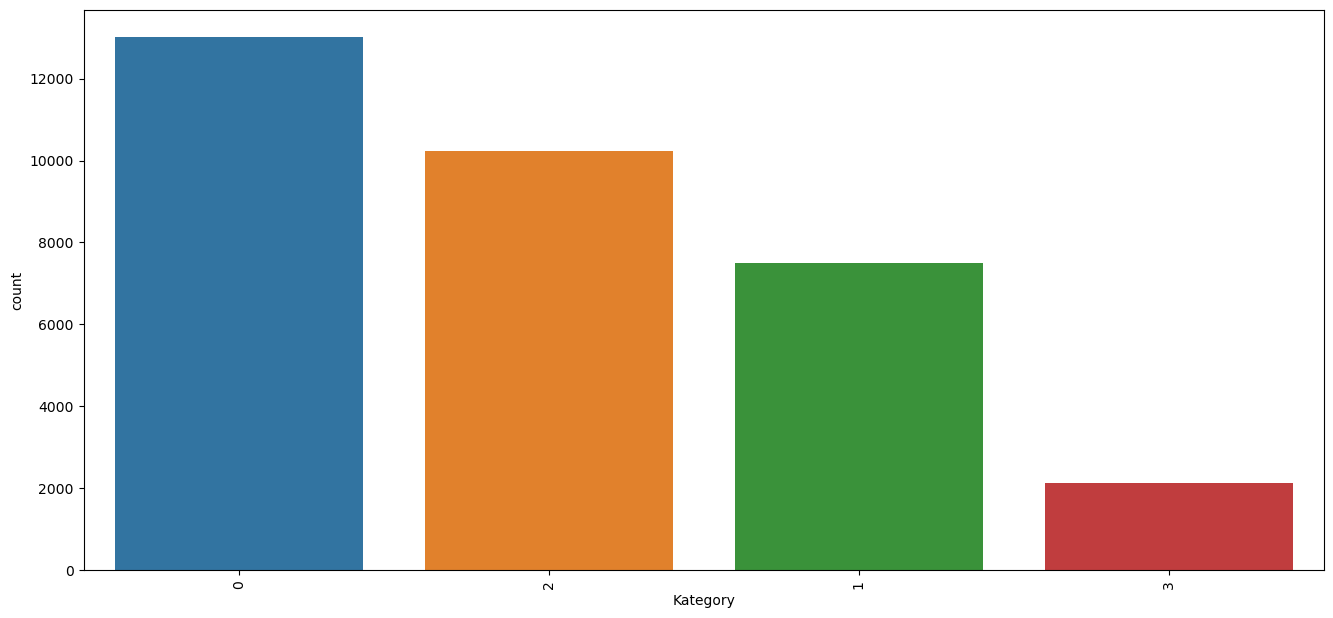

In [107]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.countplot(x="Kategory",data=data,order=data["Kategory"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [108]:
data.head(10)

,Alan Uzantısı,Resim Sayısı,Multi Medya Kullanım Sayısı,Toplam Kelime Sayısı,Paragraf Sayısı,H1 Sayısı,H2 Sayısı,H3 Sayısı,Kalın Kelime Sayısı,Liste Sayısı,...,Buton Sayısı,Girdi Sayısı,Responsive Tasarım Varlığı,Sosyal Medya Varlığı,Ödeme Sistemlerinin Varlığı,Çerezlerin Varlığı,Meta Tag Sayısı,Arama Fonksiyonu,Menü Sayısı,Kategory
2,46,38.0,38.0,772.0,1.0,0.0,0.0,0.0,0.0,28.0,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0
3,46,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,46,13.0,13.0,379.0,50.0,1.0,0.0,0.0,2.0,64.0,...,0.0,4.0,1.0,0.0,0.0,0.0,17.0,0.0,2.0,0
5,46,5.0,6.0,320.0,16.0,1.0,0.0,0.0,44.0,0.0,...,2.0,6.0,1.0,1.0,0.0,0.0,28.0,0.0,0.0,0
6,46,11.0,12.0,104.0,36.0,3.0,4.0,4.0,13.0,12.0,...,1.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0
10,46,3.0,3.0,59.0,3.0,0.0,0.0,0.0,0.0,28.0,...,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0
11,46,27.0,27.0,130.0,21.0,2.0,7.0,7.0,3.0,34.0,...,1.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,0
13,144,7.0,7.0,248.0,24.0,3.0,4.0,4.0,54.0,92.0,...,0.0,0.0,1.0,0.0,0.0,0.0,21.0,0.0,1.0,0
17,46,38.0,39.0,1182.0,2.0,0.0,1.0,1.0,216.0,84.0,...,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
20,158,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [109]:
data = data.rename(columns={
    "Alan Uzantısı": "alan_uzantisi",
    "Resim Sayısı": "resim_sayisi",
    "Multi Medya Kullanım Sayısı": "multi_medya_sayisi",
    "Toplam Kelime Sayısı": "toplam_kelime",
    "Paragraf Sayısı": "paragraf_sayisi",
    "H1 Sayısı": "h1_sayisi",
    "H2 Sayısı": "h2_sayisi",
    "H3 Sayısı": "h3_sayisi",
    "Kalın Kelime Sayısı": "kalin_kelime_sayisi",
    "Liste Sayısı": "liste_sayisi",
    "Bağlantı Sayısı": "baglanti_sayisi",
    "Dış Bağlantı Sayısı": "dis_baglanti_sayisi",
    "İç Bağlantı Sayısı": "ic_baglanti_sayisi",
    "Form Sayısı": "form_sayisi",
    "Buton Sayısı": "buton_sayisi",
    "Girdi Sayısı": "girdi_sayisi",
    "Responsive Tasarım Varlığı": "responsive_tasarim",
    "Sosyal Medya Varlığı": "sosyal_medya",
    "Ödeme Sistemlerinin Varlığı": "odeme_sistemlerinin",
    "Çerezlerin Varlığı": "cerezlerin",
    "Meta Tag Sayısı": "meta_tag",
    "Arama Fonksiyonu": "arama_fonksiyonu",
    "Menü Sayısı": "menu_sayisi",
    "Kategory": "kategory"
})

C:\Users\altay\AppData\Local\Temp\ipykernel_480\4086803732.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[index]], ax=ax[i][j], bins=20)
C:\Users\altay\AppData\Local\Temp\ipykernel_480\4086803732.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[index]], ax=ax[

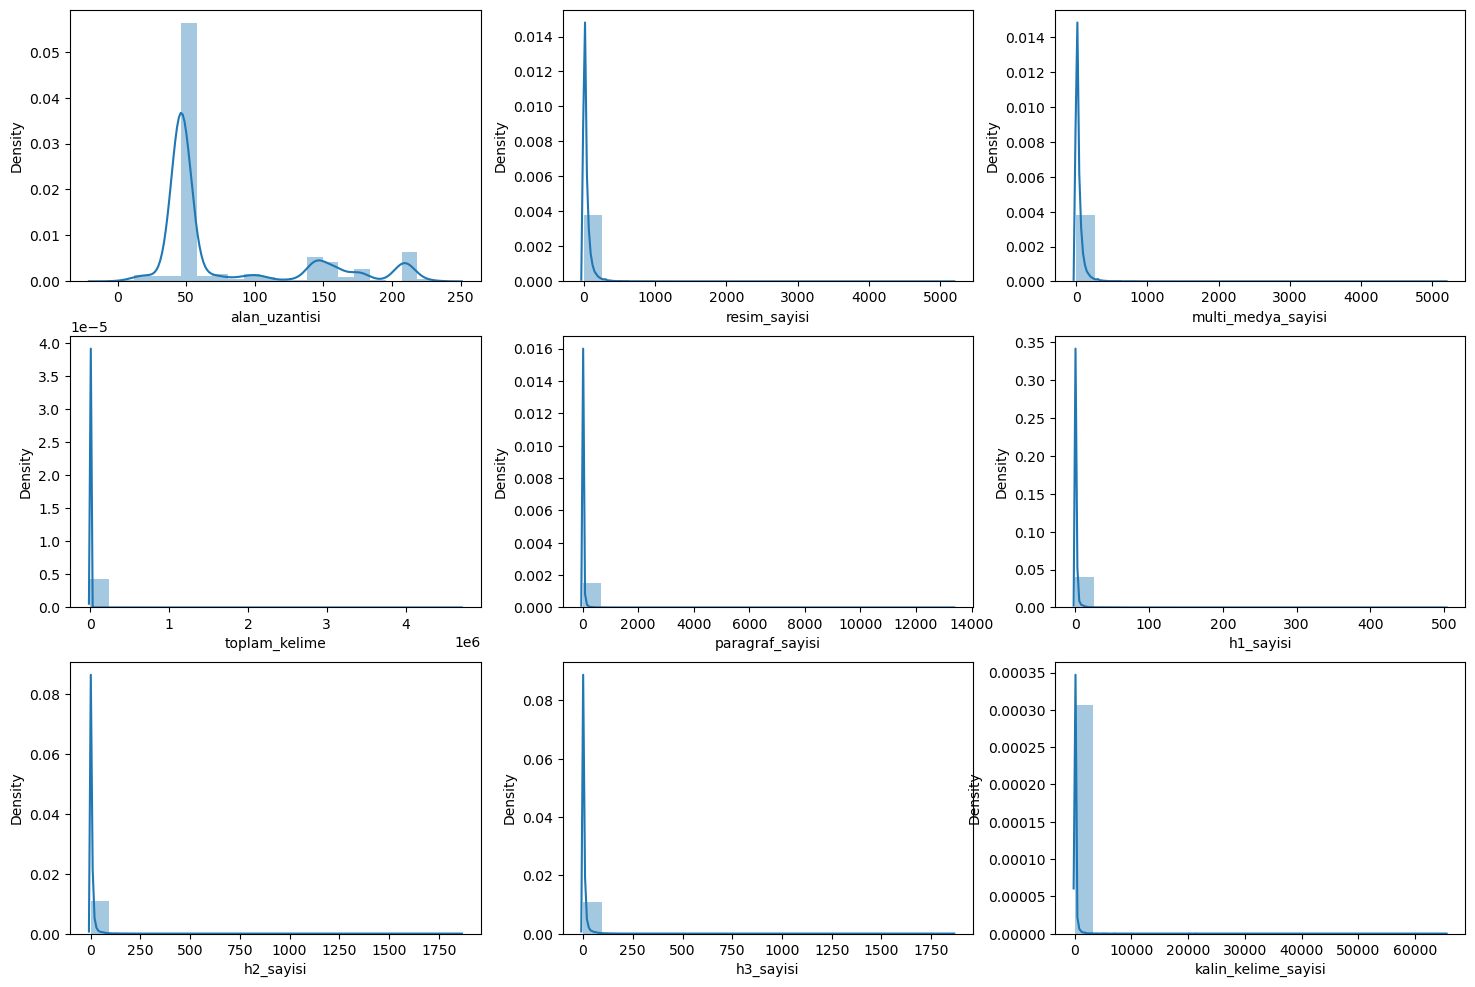

In [110]:
columns = ['alan_uzantisi', 'resim_sayisi', 'multi_medya_sayisi',
       'toplam_kelime','paragraf_sayisi',"h1_sayisi",'h2_sayisi','h3_sayisi',
        'kalin_kelime_sayisi','liste_sayisi',"baglanti_sayisi","dis_baglanti_sayisi","ic_baglanti_sayisi","form_sayisi","buton_sayisi",
           "girdi_sayisi","responsive_tasarim","sosyal_medya","odeme_sistemlerinin","cerezlerin","meta_tag","arama_fonksiyonu",
           "menu_sayisi","kategory"]


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(data[columns[index]], ax=ax[i][j], bins=20)
            index+=1

        
distplot(3, 3, columns)

In [111]:
df_games= data[data['kategory'] == 0]
df_newsandmedia= data[data['kategory'] == 1 ]
df_shopping= data[data['kategory'] == 2 ]
df_socialnetworking= data[data['kategory'] == 3]

In [112]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13032 entries, 2 to 32618
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alan_uzantisi        13032 non-null  int32  
 1   resim_sayisi         13032 non-null  float64
 2   multi_medya_sayisi   13032 non-null  float64
 3   toplam_kelime        13032 non-null  float64
 4   paragraf_sayisi      13032 non-null  float64
 5   h1_sayisi            13032 non-null  float64
 6   h2_sayisi            13032 non-null  float64
 7   h3_sayisi            13032 non-null  float64
 8   kalin_kelime_sayisi  13032 non-null  float64
 9   liste_sayisi         13032 non-null  float64
 10  baglanti_sayisi      13032 non-null  float64
 11  dis_baglanti_sayisi  13032 non-null  float64
 12  ic_baglanti_sayisi   13032 non-null  float64
 13  form_sayisi          13032 non-null  float64
 14  buton_sayisi         13032 non-null  float64
 15  girdi_sayisi         13032 non-null  floa

In [113]:
data_columns_header=data.columns

In [119]:
for column in data_columns_header: 
    if column not in ['sosyal_medya','toplam_kelime','arama_fonksiyonu','alan_uzantisi','responsive_tasarım','odeme_sistemlerinin','cerezlerin','kategory']:                        
        
        most_common_values = df_socialnetworking[column].value_counts().nlargest(25).index.tolist()
        most_common_values = [value for value in most_common_values if value not in [0]]
        #print(f"\nEn çok geçen 10 değer ({column} kategorisi için): {most_common_values}")
        df_games[column].value_counts()
        zero_rows = df_games[df_games[column] == 0].index
# 0 değerine sahip satırlara rastgele en sık geçen değerleri atama
        num_assignments = min(2000, len(zero_rows))  # Atanacak satır sayısı
        if num_assignments > 0:        
            random_assignments = np.random.choice(most_common_values, size=num_assignments)  # En sık geçen değerlerden rastgele atama
            #print(random_assignments)
            random_indices = np.random.choice(zero_rows, size=num_assignments, replace=False)  # Rastgele 0 değerine sahip satırlar
            #print(random_indices)
            df_games.loc[random_indices, column] = random_assignments
            
  # Rastgele değerleri atama

In [118]:
for column in data_columns_header: 
    if column not in ['Sosyal Medya Varlığı','Toplam Kelime Sayısı','Arama Fonksiyonu', 'Alan Uzantısı','Responsive Tasarım Varlığı','Ödeme Sistemlerinin Varlığı','Çerezlerin Varlığı','Kategory']:                        
        
        most_common_values = df_socialnetworking[column].value_counts().nlargest(25).index.tolist()
        most_common_values = [value for value in most_common_values if value not in [0]]
        #print(f"\nEn çok geçen 10 değer ({column} kategorisi için): {most_common_values}")
        df_newsandmedia[column].value_counts()
        zero_rows = df_newsandmedia[df_newsandmedia[column] == 0].index
# 0 değerine sahip satırlara rastgele en sık geçen değerleri atama
        num_assignments = min(2000, len(zero_rows))  # Atanacak satır sayısı
        if num_assignments > 0:
            
            random_assignments = np.random.choice(most_common_values, size=num_assignments)  # En sık geçen değerlerden rastgele atama
            #print(random_assignments)
            random_indices = np.random.choice(zero_rows, size=num_assignments, replace=False)  # Rastgele 0 değerine sahip satırlar
            #print(random_indices)
            df_newsandmedia.loc[random_indices, column] = random_assignments
            
  # Rastgele değerleri atama

In [117]:
for column in data_columns_header: 
    if column not in ['Sosyal Medya Varlığı','Toplam Kelime Sayısı','Arama Fonksiyonu', 'Alan Uzantısı','Responsive Tasarım Varlığı','Ödeme Sistemlerinin Varlığı','Çerezlerin Varlığı','Kategory']:                        
        
        most_common_values = df_socialnetworking[column].value_counts().nlargest(25).index.tolist()
        most_common_values = [value for value in most_common_values if value not in [0]]
        #print(f"\nEn çok geçen 10 değer ({column} kategorisi için): {most_common_values}")
        df_shopping[column].value_counts()
        zero_rows = df_shopping[df_shopping[column] == 0].index
# 0 değerine sahip satırlara rastgele en sık geçen değerleri atama
        num_assignments = min(2000, len(zero_rows))  # Atanacak satır sayısı
        if num_assignments > 0:
            
            random_assignments = np.random.choice(most_common_values, size=num_assignments)  # En sık geçen değerlerden rastgele atama
            #print(random_assignments)
            random_indices = np.random.choice(zero_rows, size=num_assignments, replace=False)  # Rastgele 0 değerine sahip satırlar
            #print(random_indices)
            df_shopping.loc[random_indices, column] = random_assignments
            
  # Rastgele değerleri atama

In [116]:
for column in data_columns_header: 
    if column not in ['Sosyal Medya Varlığı','Toplam Kelime Sayısı','Arama Fonksiyonu', 'Alan Uzantısı','Responsive Tasarım Varlığı','Ödeme Sistemlerinin Varlığı','Çerezlerin Varlığı','Kategory']:                        
        
        most_common_values = df_socialnetworking[column].value_counts().nlargest(25).index.tolist()
        most_common_values = [value for value in most_common_values if value not in [0]]
        #print(f"\nEn çok geçen 10 değer ({column} kategorisi için): {most_common_values}")
        df_socialnetworking[column].value_counts()
        zero_rows = df_socialnetworking[df_socialnetworking[column] == 0].index
# 0 değerine sahip satırlara rastgele en sık geçen değerleri atama
        num_assignments = min(2000, len(zero_rows))  # Atanacak satır sayısı
        if num_assignments > 0:
            
            random_assignments = np.random.choice(most_common_values, size=num_assignments)  # En sık geçen değerlerden rastgele atama
            #print(random_assignments)
            random_indices = np.random.choice(zero_rows, size=num_assignments, replace=False)  # Rastgele 0 değerine sahip satırlar
            #print(random_indices)
            df_socialnetworking.loc[random_indices, column] = random_assignments
            
  # Rastgele değerleri atama

In [120]:
df_merged = pd.concat([df_games, df_newsandmedia, df_shopping, df_socialnetworking], axis=0, ignore_index=True)

In [121]:
for column in data_columns_header:
    most_common_value = df_merged[column].value_counts().idxmax()
    count_of_most_common = df_merged[column].value_counts().max()
    print(f"{column} sütunundaki en fazla geçen değer: {most_common_value} ({count_of_most_common} kez)")

alan_uzantisi sütunundaki en fazla geçen değer: 46 (19563 kez)
resim_sayisi sütunundaki en fazla geçen değer: 1.0 (2281 kez)
multi_medya_sayisi sütunundaki en fazla geçen değer: 1.0 (2222 kez)
toplam_kelime sütunundaki en fazla geçen değer: 1.0 (585 kez)
paragraf_sayisi sütunundaki en fazla geçen değer: 1.0 (2674 kez)
h1_sayisi sütunundaki en fazla geçen değer: 1.0 (14189 kez)
h2_sayisi sütunundaki en fazla geçen değer: 0.0 (4606 kez)
h3_sayisi sütunundaki en fazla geçen değer: 0.0 (5414 kez)
kalin_kelime_sayisi sütunundaki en fazla geçen değer: 0.0 (7028 kez)
liste_sayisi sütunundaki en fazla geçen değer: 5.0 (860 kez)
baglanti_sayisi sütunundaki en fazla geçen değer: 1.0 (1339 kez)
dis_baglanti_sayisi sütunundaki en fazla geçen değer: 0.0 (3248 kez)
ic_baglanti_sayisi sütunundaki en fazla geçen değer: 0.0 (4646 kez)
form_sayisi sütunundaki en fazla geçen değer: 1.0 (8708 kez)
buton_sayisi sütunundaki en fazla geçen değer: 0.0 (5504 kez)
girdi_sayisi sütunundaki en fazla geçen değer: 

C:\Users\altay\AppData\Local\Temp\ipykernel_480\4086803732.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[index]], ax=ax[i][j], bins=20)
C:\Users\altay\AppData\Local\Temp\ipykernel_480\4086803732.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[index]], ax=ax[

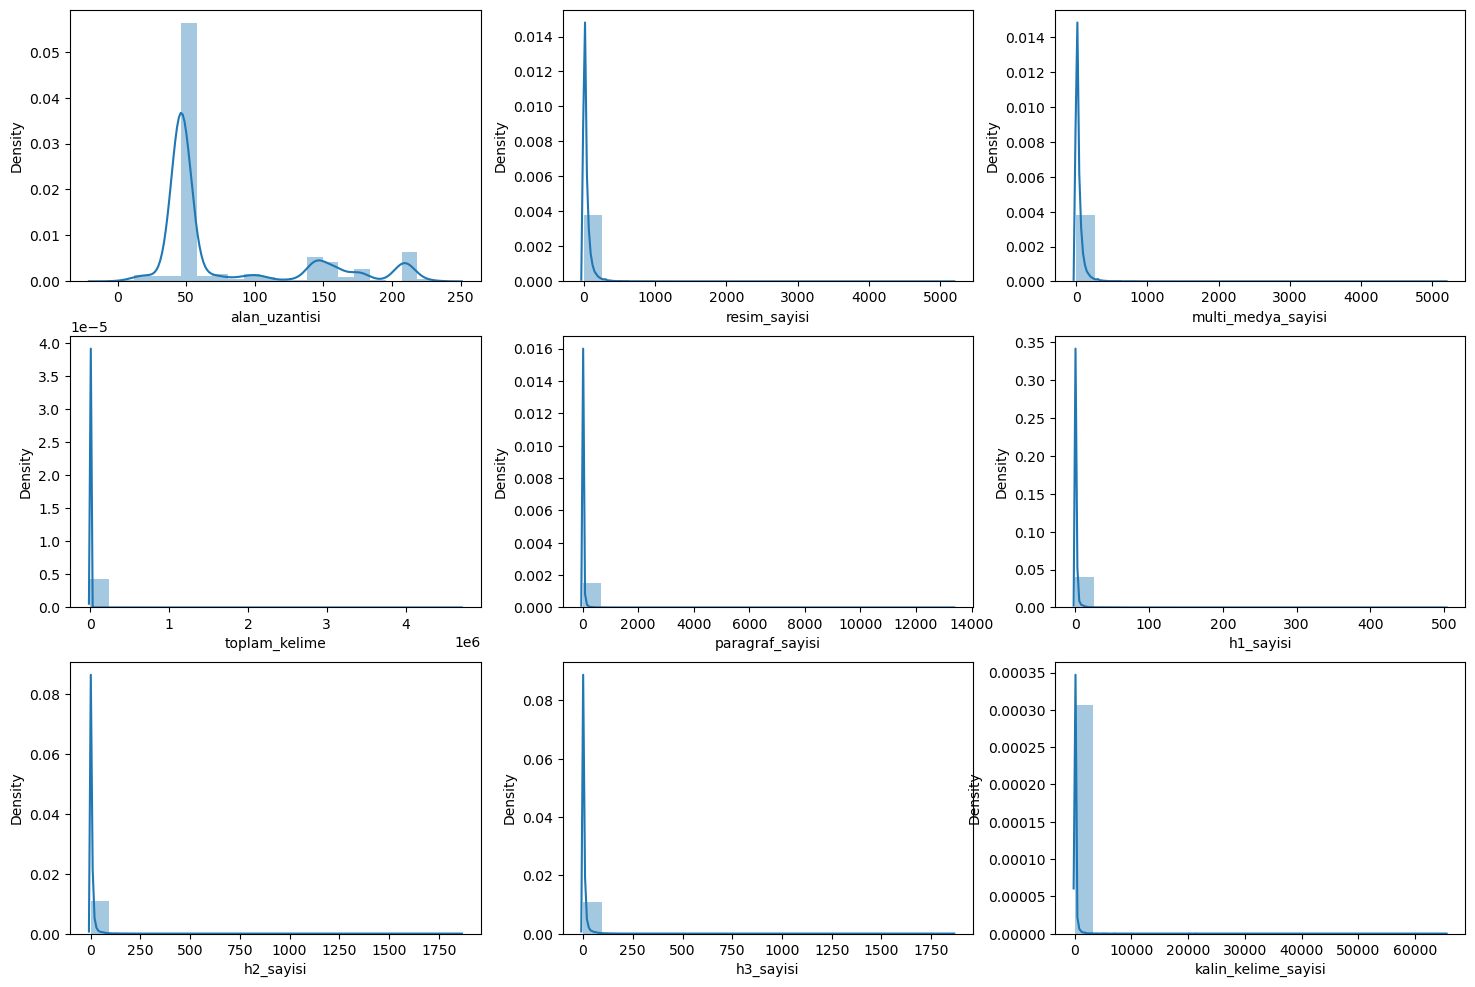

In [122]:
columns = ['alan_uzantisi', 'resim_sayisi', 'multi_medya_sayisi',
       'toplam_kelime','paragraf_sayisi',"h1_sayisi",'h2_sayisi','h3_sayisi',
        'kalin_kelime_sayisi','liste_sayisi',"baglanti_sayisi","dis_baglanti_sayisi","ic_baglanti_sayisi","form_sayisi","buton_sayisi",
           "girdi_sayisi","responsive_tasarim","sosyal_medya","odeme_sistemlerinin","cerezlerin","meta_tag","arama_fonksiyonu",
           "menu_sayisi","kategory"]


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(data[columns[index]], ax=ax[i][j], bins=20)
            index+=1

        
distplot(3, 3, columns)

<Axes: >

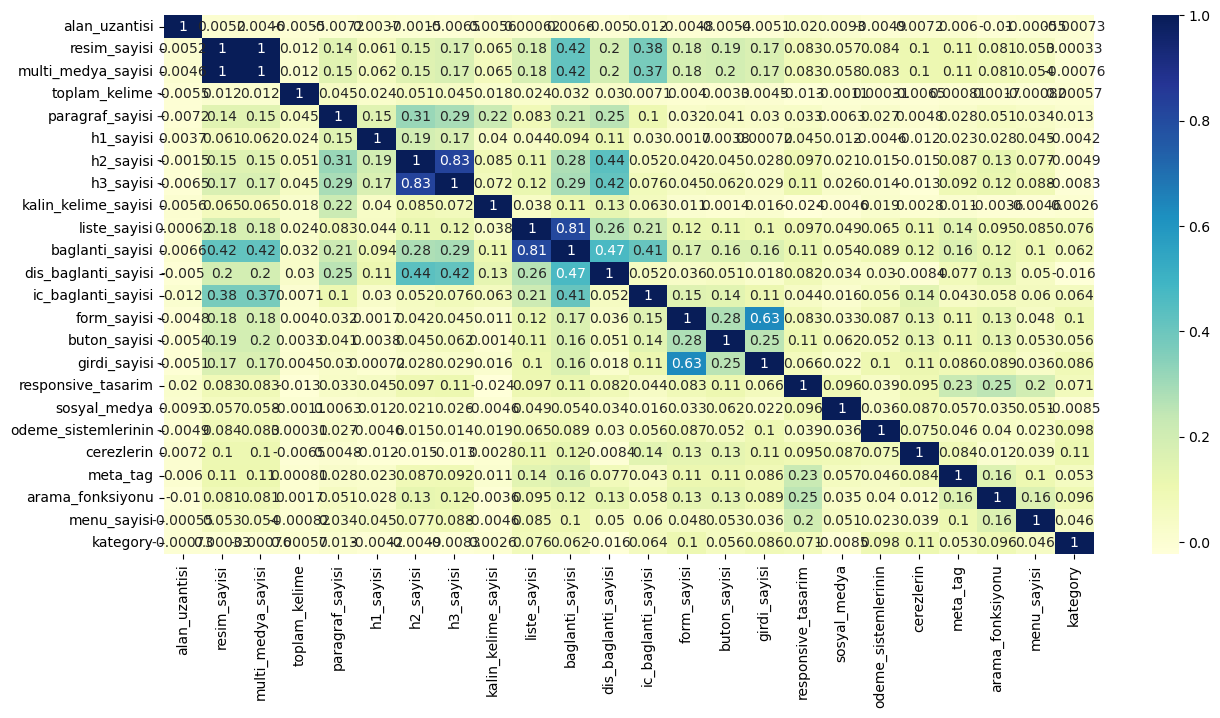

In [123]:
plt.figure(figsize=(15,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [125]:
corr_matrix['kategory'].sort_values(ascending=False)

kategory               1.000000
cerezlerin             0.107649
form_sayisi            0.103087
odeme_sistemlerinin    0.098323
arama_fonksiyonu       0.095959
girdi_sayisi           0.086041
liste_sayisi           0.075869
responsive_tasarim     0.071385
ic_baglanti_sayisi     0.064191
baglanti_sayisi        0.061578
buton_sayisi           0.056240
meta_tag               0.053194
menu_sayisi            0.046401
paragraf_sayisi        0.013000
kalin_kelime_sayisi    0.002580
toplam_kelime          0.000571
resim_sayisi           0.000326
alan_uzantisi         -0.000727
multi_medya_sayisi    -0.000763
h1_sayisi             -0.004228
h2_sayisi             -0.004882
h3_sayisi             -0.008347
sosyal_medya          -0.008498
dis_baglanti_sayisi   -0.015932
Name: kategory, dtype: float64

In [126]:
df_merged.to_csv('web_features_preprocessing_data.csv', index=False)